# Machine Learning SS 2021
## Análisis exploratorio

In [1]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# dataframe desde un archivo csv de kaggle
filename = open("../input/forbes-athletes-19902020/forbes.csv", "r")
df = pd.read_csv(filename)

In [3]:
# 5 primeras filas
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


La columna "Previous Year Tank" presenta muchos datos nulos

In [4]:
# las ultimas
df.tail()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


La columna mencionada no tiene sus últimos datos nulos

In [5]:
  # distintos tipos de datos
  df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

Todos los tipos de datos parecen normales excepto por "Previous Year Rank" que aparece como "Object" por ser mayor o menor que cierto valor

In [6]:
# estádisticas de posición centrales y no centrales, dispersión estandar y promedio
# variables númericas
df.describe(include=np.number)

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


* El promedio de millones de dolares recibidos es de \$45.4
* El minimo recibido es de \$8.1 millones
* El máximo recibido es de \$300 millones

In [7]:
# variables categoricas
# Retorna número de valores únicos, valor más común y su frecuencia
df.describe(include=object)

,Name,Nationality,Previous Year Rank,Sport
count,301,301,277,301
unique,82,22,36,29
top,Tiger Woods,USA,>10,Basketball
freq,19,206,36,54


* Michael Jordan es el atleta más frecuente en el top de atletas mejores pagados desde 1990 a 2020
* La nacionalidad más frecuente es USA
* El deporte más frecuente es el Basketball

In [8]:
# Sacar la moda de todas las variables
df.mode().value_counts().reset_index(name="count")

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),count
0,1,Michael Jordan,USA,9.0,>10,Basketball,2002.0,35.0,1


In [9]:
# frecuencia de las variables más relevantes
# Nacionalidad
df_nationality = df["Nationality"].value_counts()
df_nationality

USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: Nationality, dtype: int64

En el top 5 de naciones con atletas mejor pagados se encuentran: Estados Unidos, Alemania, Reino Unido, Suiza y Portugal

<AxesSubplot:>

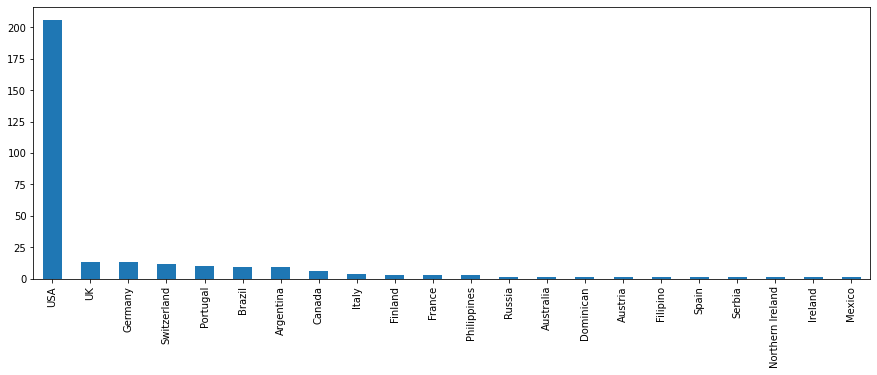

In [10]:
df_nationality.plot(kind="bar", figsize=(15,5))

In [11]:
# Sports
df["Sport"].value_counts()

Basketball                      54
Boxing                          29
basketball                      27
Golf                            24
Soccer                          22
golf                            20
Tennis                          18
boxing                          17
American Football               17
soccer                          11
Auto Racing                     10
F1 racing                        8
auto racing                      7
tennis                           5
F1 Motorsports                   5
motorcycle gp                    4
NFL                              3
Baseball                         3
NASCAR                           3
baseball                         3
Ice Hockey                       2
Auto Racing (Nascar)             2
cycling                          1
American Football / Baseball     1
Hockey                           1
ice hockey                       1
NBA                              1
Auto racing                      1
MMA                 

Aqui vemos que por ejemplo "Basketball" y "basketball" son variables distintas, por lo que las uniremos

In [12]:
# Uniendo variables, reemplaza el deporte por su nombre general y las ligas al deporte asociado
df["Sport"].replace({"basketball": "Basketball", 
                     "golf": "Golf", 
                     "boxing":"Boxing", 
                     "soccer":"Soccer", 
                     "auto racing": "Auto racing", 
                     "tennis": "Tennis", 
                     "ice hockey":"Ice Hockey", 
                     "NBA":"Basketball", 
                     "Hockey": "Ice Hockey", 
                     "baseball":"Baseball", 
                     "Auto Racing (Nascar)":"Auto Racing", 
                     "NASCAR":"Auto Racing", 
                     "Auto racing":"Auto Racing", 
                     "NFL":"American Football", 
                     "F1 Motorsports":"F1 racing"}, inplace=True)

In [13]:
# Y ahora los datos están correctos
df_sport = df["Sport"].value_counts()
df_sport

Basketball                      82
Boxing                          46
Golf                            44
Soccer                          33
Tennis                          23
American Football               20
Auto Racing                     16
F1 racing                       13
Auto racing                      7
Baseball                         6
Ice Hockey                       4
motorcycle gp                    4
American Football / Baseball     1
cycling                          1
MMA                              1
Name: Sport, dtype: int64

Tenemos que el Basketball es el deporte con mayor cantidad de jugadores mejor pagados, le sigue el Boxing y el Golf

<AxesSubplot:ylabel='Sport'>

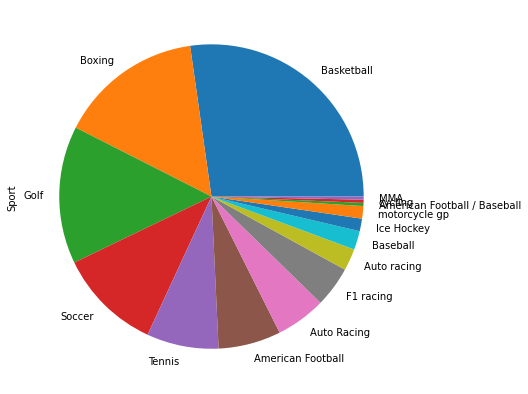

In [14]:
df_sport.plot(kind='pie', figsize=(7,7))

In [15]:
# correlación entre Nacionalidad, Deporte y dolares en total
df_nse = df[["Nationality","Sport", "earnings ($ million)"]].groupby(["Nationality", "Sport"], as_index=False).sum()
df_nse.sort_values(by="earnings ($ million)", ascending=False)

,Nationality,Sport,earnings ($ million)
34,USA,Basketball,3433.3
36,USA,Golf,2078.0
35,USA,Boxing,1890.6
30,USA,American Football,938.7
22,Portugal,Soccer,787.1
26,Switzerland,Tennis,781.1
0,Argentina,Soccer,715.5
16,Germany,F1 racing,516.0
29,UK,Soccer,362.4
5,Brazil,Soccer,358.5


Como podemos apreciar Estados Unidos es el único país que tiene jugadores en Basketball, el deporte con más dinero y el único que no se repite en esta lista.

<AxesSubplot:xlabel='earnings ($ million)', ylabel='Sport'>

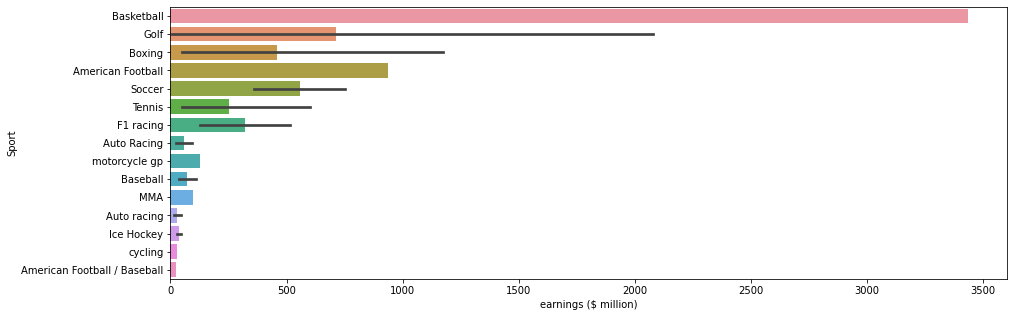

In [16]:
# grafico de barras que muestra la relación entre deporte y dinero ganado
plt.figure(figsize=(15,5))
df_nse.sort_values(by="earnings ($ million)", ascending=False, inplace=True)
sns.barplot(data=df_nse, y="Sport", x="earnings ($ million)")

<AxesSubplot:xlabel='earnings ($ million)', ylabel='Sport'>

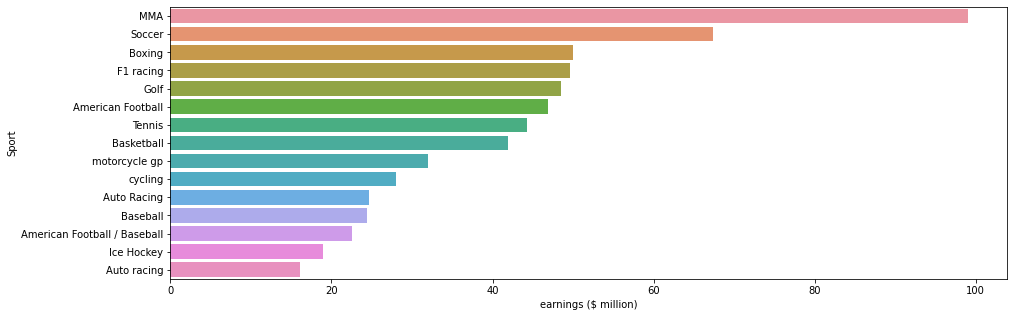

In [17]:
# correlación entre el deporte y su promedio de ganancias
df_nse1 = df[["Sport", "earnings ($ million)"]].groupby(["Sport"], as_index=False).mean()
df_nse1.sort_values(by="earnings ($ million)", ascending=False, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=df_nse1, y="Sport", x="earnings ($ million)")

In [18]:
# variable categorica a partir de lo ganado por los atletas

# le daremos un nombre a cada rango
headers = ["Muy Bajo", "Bajo", "Medio", "Medio Alto", "Alto", "Muy Alto"]
# qcut de pandas para generar los bins con una proporción casi identica
df["earnings-range"] = pd.qcut(df["earnings ($ million)"], q=6, labels=headers)
df.head(15)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),earnings-range
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6,Bajo
1,2,Buster Douglas,USA,2,NaN,Boxing,1990,26.0,Bajo
2,3,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0,Muy Bajo
3,4,Ayrton Senna,Brazil,4,NaN,Auto racing,1990,10.0,Muy Bajo
4,5,Alain Prost,France,5,NaN,Auto racing,1990,9.0,Muy Bajo
5,6,Jack Nicklaus,USA,6,NaN,Golf,1990,8.6,Muy Bajo
6,7,Greg Norman,Australia,7,NaN,Golf,1990,8.5,Muy Bajo
7,8,Michael Jordan,USA,8,NaN,Basketball,1990,8.1,Muy Bajo
8,9,Arnold Palmer,USA,8,NaN,Golf,1990,8.1,Muy Bajo
9,10,Evander Holyfield,USA,8,NaN,Boxing,1990,8.1,Muy Bajo


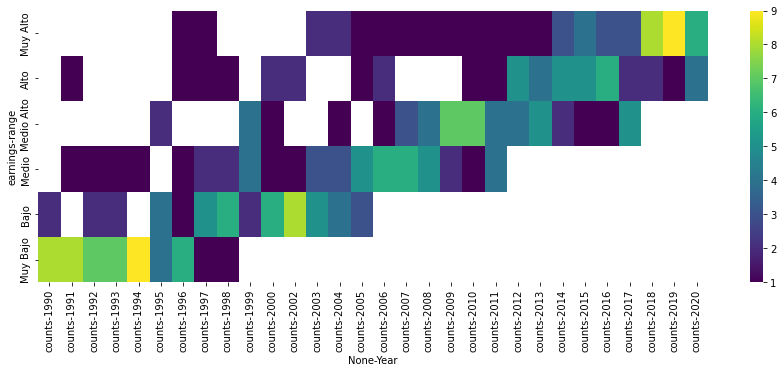

In [19]:
# gráfico a partir de los rangos generados en correlación con los años
df_ye = df[["Year","earnings-range"]].value_counts()
df_ye = df_ye.reset_index(name="counts")
df_ye_pivot = df_ye.pivot(index="earnings-range", columns="Year")
plt.figure(figsize=(15,5))
ax = sns.heatmap(df_ye_pivot, cmap="viridis")
ax.invert_yaxis()

Podemos ver que que hay una relación entre los años y lo que ganan los atletas más ricos del mundo.

El color verde claro representa el rango dominante y el color oscuro representa el menos dominante

In [20]:
# tabla con el lider de cada año
df_pse = df[df["Current Rank"] == 1]
df_pse = df_pse[["Name", "Year", "Sport", "earnings ($ million)", "earnings-range"]]
df_pse.set_index("Year", inplace=True)
df_pse.sort_values(by="Year", ascending=False)


,Name,Sport,earnings ($ million),earnings-range
Year,,,,
2020,Roger Federer,Tennis,106.3,Muy Alto
2019,Lionel Messi,Soccer,127.0,Muy Alto
2018,Floyd Mayweather,Boxing,285.0,Muy Alto
2017,Cristiano Ronaldo,Soccer,93.0,Muy Alto
2016,Cristiano Ronaldo,Soccer,88.0,Muy Alto
2015,Floyd Mayweather,Boxing,300.0,Muy Alto
2014,Floyd Mayweather,Boxing,105.0,Muy Alto
2013,Tiger Woods,Golf,78.1,Muy Alto
2012,Floyd Mayweather,Boxing,85.0,Muy Alto


In [21]:
# top 5 de atletas con más ganancias en un solo año
df_pse.sort_values(by="earnings ($ million)", ascending=False).head()

,Name,Sport,earnings ($ million),earnings-range
Year,,,,
2015,Floyd Mayweather,Boxing,300.0,Muy Alto
2018,Floyd Mayweather,Boxing,285.0,Muy Alto
2019,Lionel Messi,Soccer,127.0,Muy Alto
2008,Tiger Woods,Golf,115.0,Muy Alto
2009,Tiger Woods,Golf,110.0,Muy Alto


Notamos que:
* Entre 2002 y 2011 el Golf fué el deporte que más pagó a los atletas
* En la decada de los 90's el Basketball lideró las cifras
* Entre 2012 y 2020 Floyd Mayweather estuvo más presenta
* Floyd Mayweatherfué el atleta que más gano en todos los tiempos
* Hay una relación entre lo que ganan y los años, menor el año menor la cifra o el rango

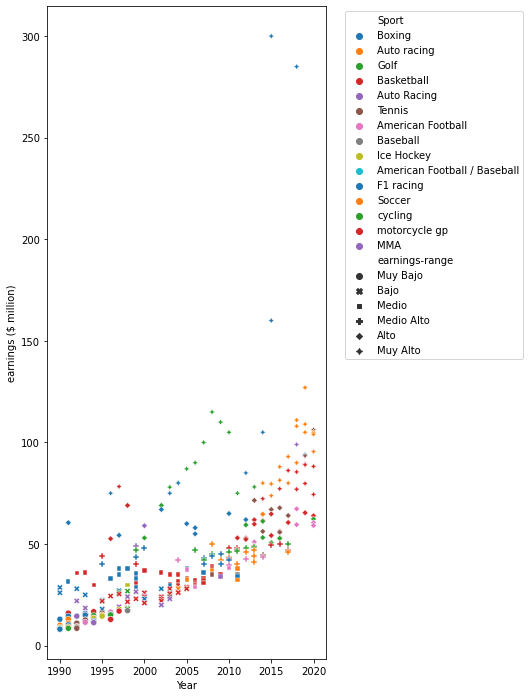

In [22]:
# Esto da una idea de la cantidad paga a medida del tiempo
plt.figure(figsize=(5,12))
ax = sns.scatterplot(data=df, x="Year", y="earnings ($ million)", hue="Sport", style="earnings-range", palette="tab10")
ax.legend(loc="best", bbox_to_anchor=(1.05, 1))


Se observa que:
* Lo ganado por lo atletas aumenta a lo largo de los años en función de sus deportes en relación directa
* A lo largo de los años los deportes han ido aumentando
** Con el aumento de deportes aumentan la cantidad que ganan los atletas
* Los deportes clásicos hoy en día son los que más pagan

## Preguntas
1. ¿Quién es la persona que más dinero ganó en un año?

Fue **Floyd Mayweather** en el año **2015** con el deporte del **Boxing**
2. ¿Cuál es el deporte que más se repite dentro de la lista?

El deporte que más se repite en la lista es el **Basketball**
3. ¿Cuál es el deporte donde más dinero se gana?

Si hablamos a lo largo del tiempo, el deporte donde más dinero se gana es el **Basketbal** con **3433.3** millones de dolares en total solo en **USA**, el único país que tiene este deporte en la lista desde **1990** hasta **2020**.

Ahora bien, si hablamos del promedio, el **MMA** se lleva el primer puesto, aunque solo hay una persona en la lista con ese deporte.

Los demás deportes, algunos, dan mucho dinero pero solo a una persona y en pocos años.

4. Incluya una pregunta creada por usted.

* ¿Quién es el atleta que más se repite en la lista del primer lugar a lo largo de los años?

* * Es **Tiger Woodscon** con 10 años consecutivos en el deporte del **Golf** desde **2002** hasta el **2011**



## Conclusiones

Gracias a las herramientas de análisis de datos podemos ver datos interesantes y relacionarlos, visualizarlos en gráficos y facilitar la exploración.
La información se está tomando el mundo y cada vez más necesitaremos del análisis estadístico para predecir y mejorar las condiciones de vida. A su vez, esta área acerca cada vez más a las personas al mundo de la programaición, haciendo de la tecnología un desarrollo que crece con nosotros.

De los datos podemos concuir que:
* Estados Unidos es el único país donde un deporte gana una posición económica en el deporte, siendo este el Basketball y con el jugador que más se repite Michael Jordan.
* El Basketball en Estados Unidos es el deporte más pagado del mundo con una suma de \$3433.3 M., sigue el Golf con \$2078 M. y el Boxing con \$1890 M. Siendo Estados Unidos el país que más ha pagado a sus atletas en los deportes más pagados de la historia desde 1990.
* Estados Unidos es el único país de America que se posiciona cómo uno de los 5 primeros que más atletas han ganado en la historia, por otra parte está Europa. America Latina le sigue en posiciones posteriores a los 5 primeros, con Argentina y Brasil.
* El Boxing y el Golf le siguen al Basketball en deportes que mejor le han pagado a sus atletas, el Golf con su exponente Tiger Woodscon que tiene una racha de 10 años consecutivos como primer lugar y Floyd Mayweather en el Boxing.
* Floyd Mayweather es la persona que más ha ganado en la historia desde 1990 con una suma de $300 M.
* Hay una relación directa entre el año y la cantidad pagada a los atletas. Mientras más antiguo el año, menor el pago y viceversa.
* En los años anteriores, el Basketball lideraba las cifras, siendo en los años posteriores una variedad de deportes.
* Existe una relación entre el deporte, el año y la cantidad. En años anteriores los deportes pagaban menos y eran unos pocos, como el Basketball, en años posteriores son más deportes que pagan más, como el Auto Racing, MMA, etc.
* Los deportes clásicos son los que más pagan hoy en día como el Boxing.
